# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Basic Understanding of The Data**

In [2]:
# Import Data & show sample

df = pd.read_csv('/content/Clicked Ads Dataset.csv')
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
652,652,85.26,32,387969680.0,224.07,Laki-Laki,2/24/2016 6:18,No,Semarang,Jawa Tengah,Health
156,156,44.64,36,390513060.0,127.01,Perempuan,2/14/2016 6:51,Yes,Surabaya,Jawa Timur,House
640,640,64.63,45,109188030.0,158.80,Laki-Laki,6/12/2016 3:11,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Health
173,173,74.41,26,450770950.0,163.05,Perempuan,7/23/2016 4:37,No,Banjarmasin,Kalimantan Selatan,House
526,526,43.65,39,445543280.0,138.87,Perempuan,5/8/2016 22:24,Yes,Cimahi,Jawa Barat,Health


# **Data Exploration**

In [3]:
# Show Data Rows & Features Number
print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

Total Rows : 1000
Total Features : 11


In [4]:
# Check duplicated value
df.duplicated().sum()

0

In [5]:
# Show Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


  insight:
  - Dataset terdiri dari 11 kolom dan 1000 baris
  - Tidak ditemukan adanya data yang duplicated
  - Ditemukan adanya null value pada beberapa kolom
  - Feature Timestamp lebih baik menggunakan type data datetime
  - Clicked on Ad akan menjadi target feature
  - Kolom Unnamed hanya berisi baris nomor urut dan kita bisa menghapusnya


# **Exploratory Data Analysis**

## **Statistical Analysis**

In [6]:
# Numeric Statistic Value
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


Insight:
- Feature Daily Time Spent on Site distribusinya skewed
- Feature Area Income distribusinya tampak skewed
- Feature Daily Internet Usage distribusinya tampak mendekati normal

In [7]:
# Categorical Statistic Value
df.describe(include = 'O').T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


Insight:

- Feature Male didominasi oleh label perempuan, yaitu sebanyak 518 dari 997
- Feature Timestamp tipe datanya dapat diubah dari object menjadi datetime untuk mempermudah analisis
- Feature Clicked on Ad memiliki jumlah yang seimbang antara label No dengan label Yes
- Feature city didominasi oleh Surabaya
- Feature province didominasi oleh Daerah Khusus Ibukota Jakarta
- Feature category didominasi oleh Otomotif

## **Univariate Analysis**

In [8]:
# pengelompokan kolom berdasarkan jenisnya
numerical = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'] #except unnamed
categorical = ['Male', 'Clicked on Ad', 'city', 'province', 'category']  #except timestamp

### **Box plots**

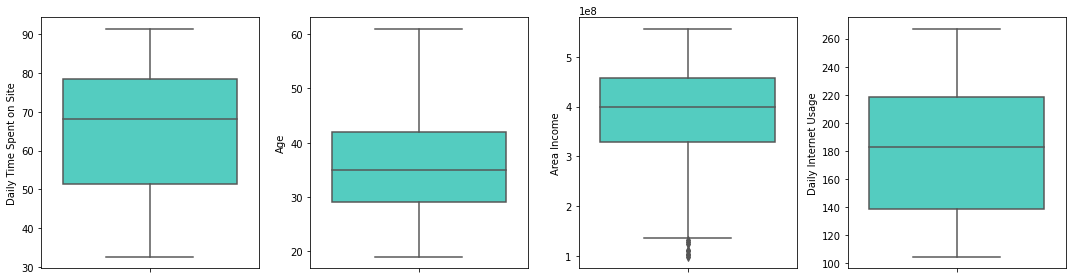

In [9]:
features = numerical
plt.figure(figsize=(15,4))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='turquoise', orient='v')
    plt.tight_layout()

Insight:
- Outliers hanya ada pada feature Area Income

### **Distribution plots**

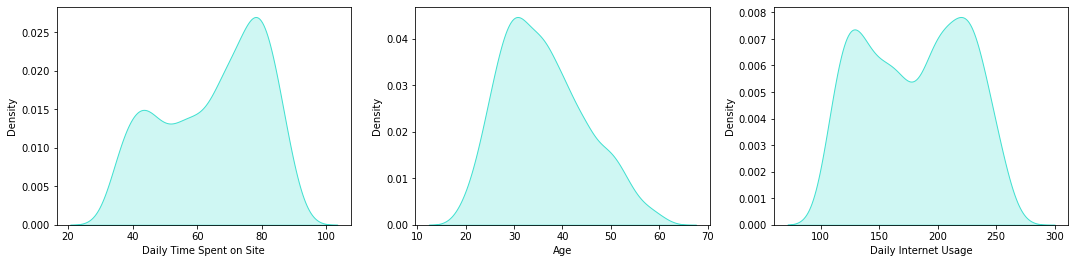

In [10]:
nums = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage'] #except area income
plt.figure(figsize=(25, 25))
for i in range(0, len(nums)):
    plt.subplot(7, 5, i+1)
    sns.kdeplot(data=df, x=nums[i], color='turquoise', shade=True)
    plt.xlabel(nums[i])
    plt.tight_layout()

Insight:
- Feature Daily Time Spent on Site memiliki distribusi skew dengan nilai rata-rata lebih besar dari nilai median
- Feature Age mendekati distribusi normal dengan umur rata-rata 36 tahun
- Feature Daily Internet Usage memiliki distribusi skew dengan nilai median lebih besar dari nilai rata-rata

### **Individual Count Plot (Categorical)**

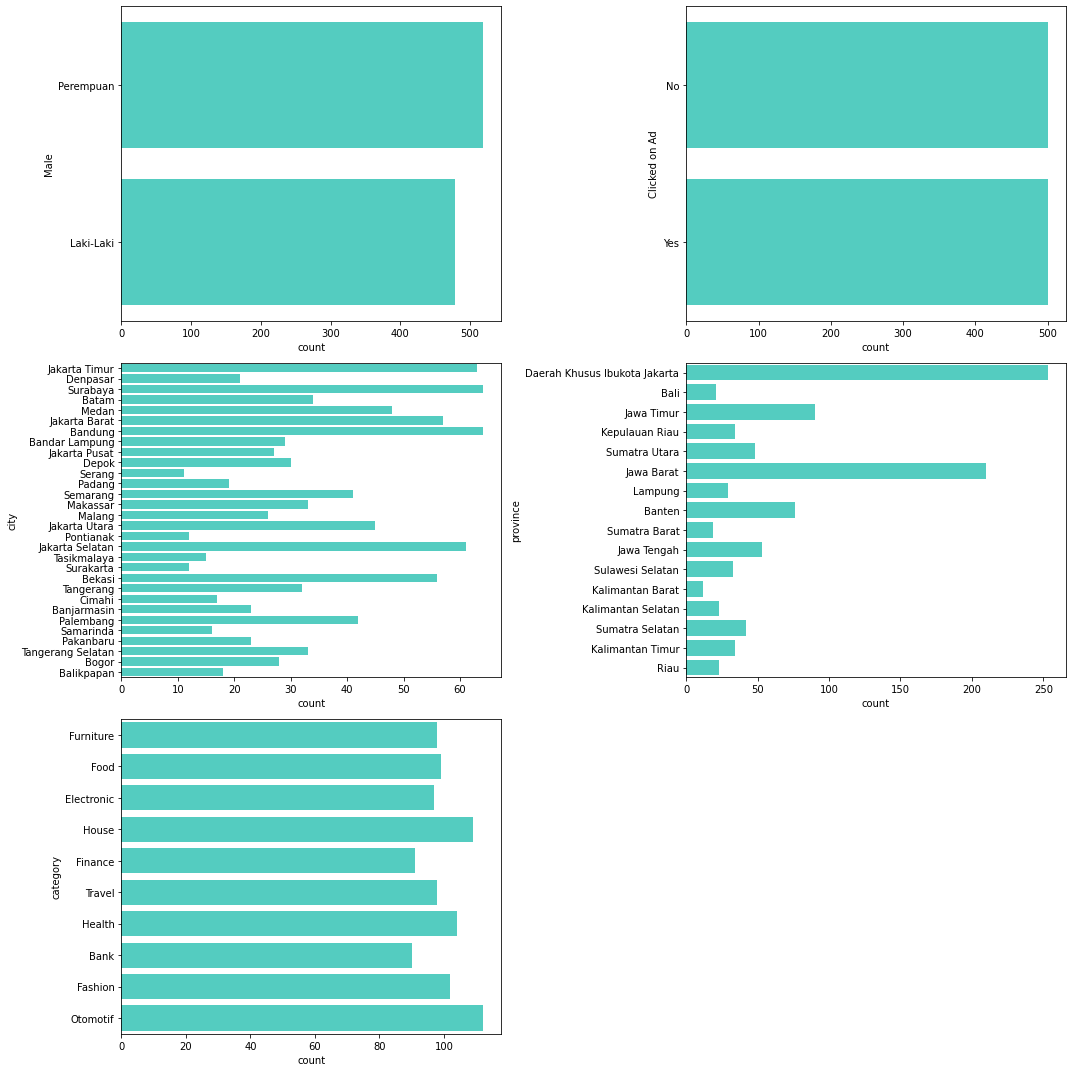

In [11]:
plt.figure(figsize=(15,15))
for i in range(0,len(categorical)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[categorical[i]], orient = 'h',color='turquoise')
    plt.tight_layout()

Insight:

- Feature Clicked on Ad memiliki jumlah yang seimbang antara label No dengan label Yes
- Feature city didominasi oleh Surabaya
- Feature province didominasi oleh Daerah Khusus Ibukota Jakarta
- Feature category didominasi oleh Otomotif

## **Biavariate Analaysis**

In [12]:
cek = df.groupby('Clicked on Ad')['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'].agg(['mean','median'])
cek

Daily Time Spent on Site             Age          Area Income  \
                                  mean  median    mean median          mean   
Clicked on Ad                                                                 
No                           76.787805  77.615  31.684   31.0  4.299090e+08   
Yes                          53.143111  51.500  40.334   40.0  3.400933e+08   

                           Daily Internet Usage          
                    median                 mean  median  
Clicked on Ad                                            
No             436334990.0           214.595233  216.50  
Yes            344980090.0           145.342077  138.79

### **Distribution Numerical**

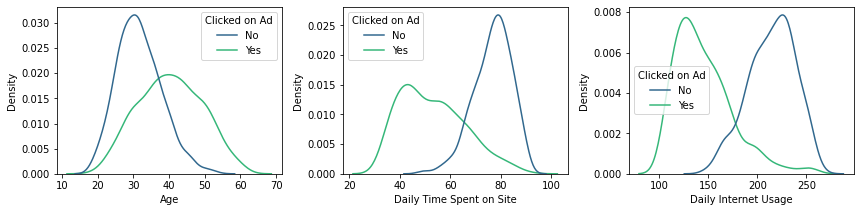

In [13]:
num = ['Age','Daily Time Spent on Site','Daily Internet Usage']  #except area income
plt.figure(figsize=(20, 20))
for i in range(0, len(num)):
    plt.subplot(7, 5, i+1)
    sns.kdeplot(data=df, x=num[i], hue='Clicked on Ad', palette='viridis')
    plt.xlabel(num[i])
    plt.tight_layout()

### **Boxplot Numerical**

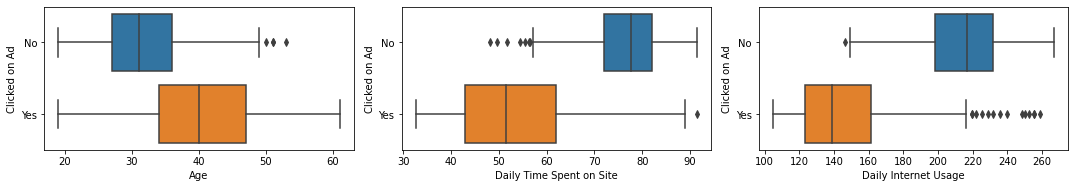

In [14]:
num = ['Age','Daily Time Spent on Site','Daily Internet Usage']  #except area income
plt.figure(figsize=(20, 10))
for i in range(0, len(num)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[num[i]],y=df['Clicked on Ad'])
    plt.xlabel(num[i])
    plt.tight_layout()

<Figure size 720x720 with 0 Axes>

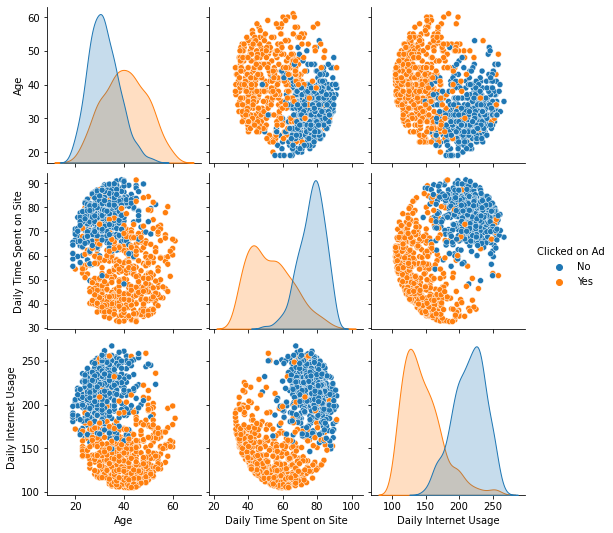

In [15]:
plt.figure(figsize = (10,10))
sns.pairplot(df[['Age','Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')
plt.show()

### **Categorical count plot**

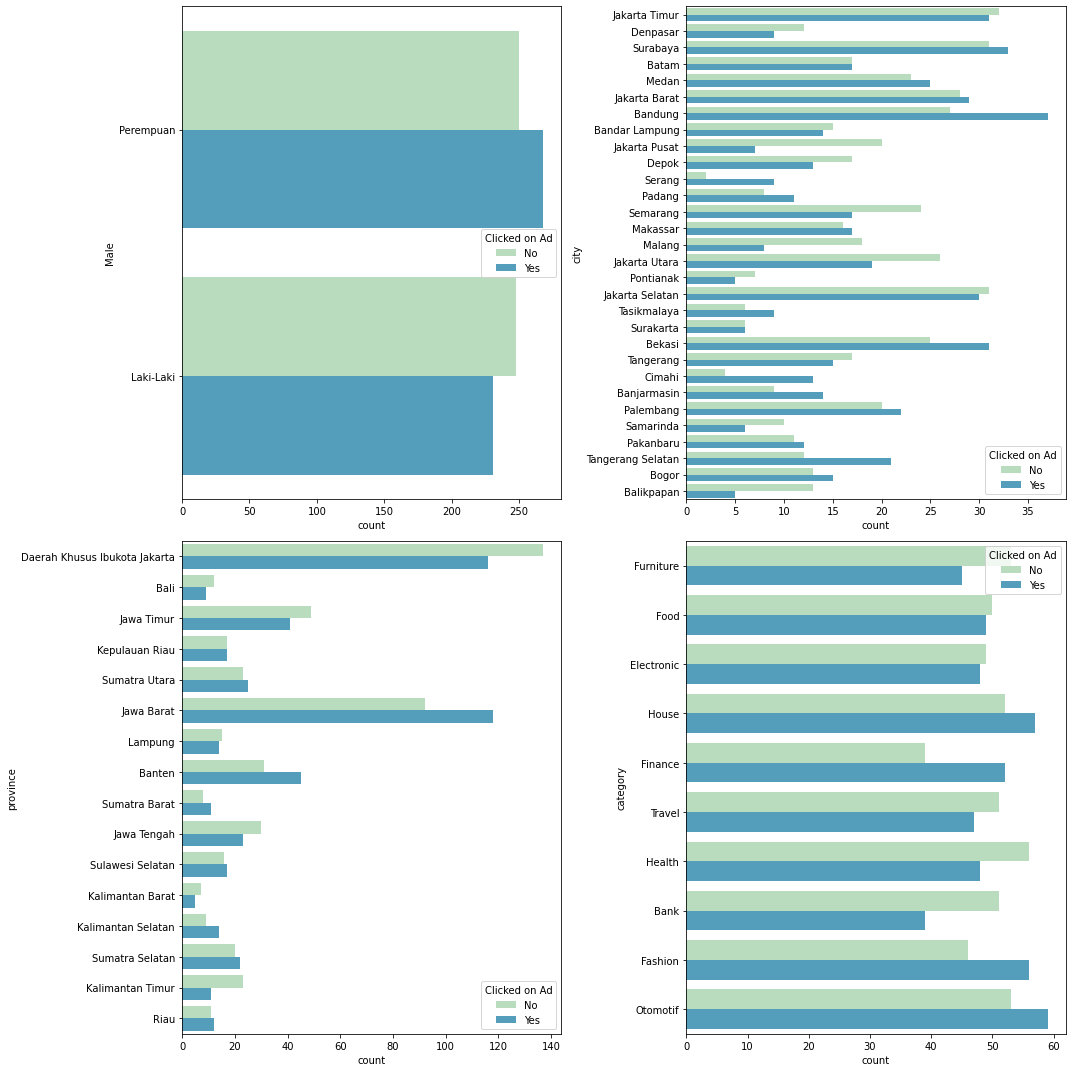

In [16]:
cats=['Male', 'city', 'province', 'category']  #except Clicked on Ad
plt.figure(figsize=(15,15))
for i in range(0,len(cats)):
    plt.subplot(2,2,i+1)
    sns.countplot(y=df[cats[i]], palette='GnBu', hue=df['Clicked on Ad'])
    plt.tight_layout()

Insiight:

- Pada feature Male, user perempuan lebih banyak mengclick Ads dibandingkan user laki-laki
- Kota Bandung menjadi jumlah user terbanyak yang mengclik ads
- User di Provinsi Jawa Barat cenderung untuk mengclick ads yang diberikan, sementara DKI Jakarta lebih banyak menghiraukan ads
- Category iklan otomotif cenderung lebih banyak untuk diclick,disusul Fashion, dan House.Sementara category Health memiliki jumlah tertinggi untuk tidak diclick Ads


## **Multivariate Analysis**

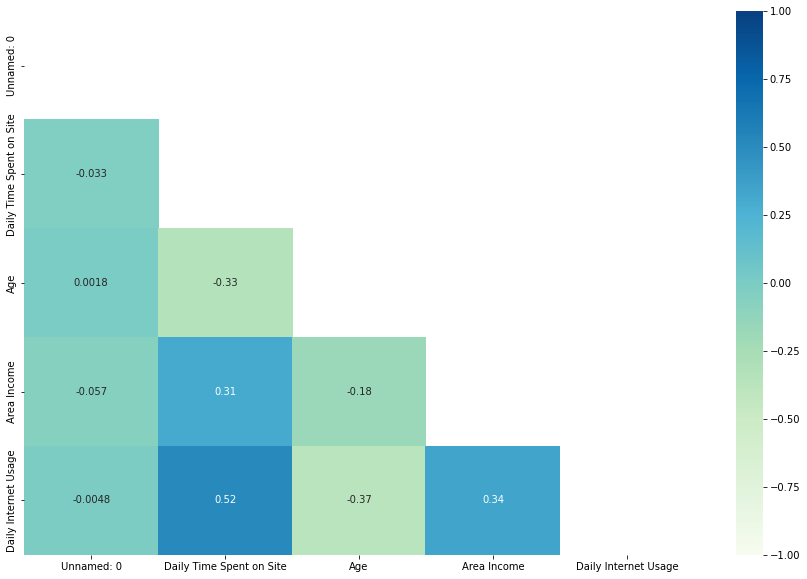

In [17]:
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='GnBu')

Insight:

- Feature Daily Time Spent on Site berkorelasi positif cukup tinggi dengan Daily Internet Usage
- Feature Age berkorelasi negatif dengan feature Daily Time Spent on Site, Area Income dan Daily Internet Usage
- Feature Area Income berkorelasi positif dengan feature Daily Time Spent on Site dan Daily Internet Usage dan berkorelasi negatif dengan feature Age

# **Data Preprocessing**

In [18]:
# Initate df_clean
df_clean = df.copy()

## **Handle missing values**

In [19]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Daily Time Spent on Site,13,1.3
1,Area Income,13,1.3
2,Daily Internet Usage,11,1.1
3,Male,3,0.3


In [20]:
# impute median for numerical feature
df_clean['Daily Time Spent on Site'].fillna(df_clean['Daily Time Spent on Site'].median(), inplace=True)
df_clean['Daily Internet Usage'].fillna(df_clean['Daily Internet Usage'].median(), inplace=True)
df_clean['Area Income'].fillna(df_clean['Area Income'].median(), inplace=True)

# impute mode for categorical feature
df_clean['Male'].fillna(df_clean['Male'].mode()[0], inplace=True)

In [21]:
df_clean.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## **Handle duplicated values**

In [22]:
df_clean.duplicated().sum()

0

## **Handling Outliers**

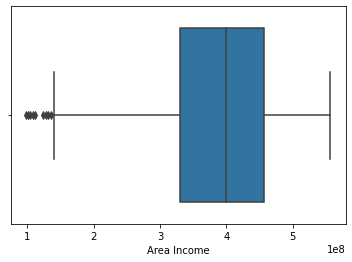

In [23]:
#Handling outlier on feature Area Income
sns.boxplot(x = df_clean['Area Income'])

In [24]:
# Handling with IQR 
Q1 = (df_clean[['Area Income']]).quantile(0.25)
Q3 = (df_clean[['Area Income']]).quantile(0.75)

IQR = Q3 - Q1
print('The IQR value of each variable is: ')
print(IQR)

maximum = Q3 + (1.5*IQR)
print('Maximum Value of each Variable is:')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nManimum Value of each Variable is:')
print(minimum)
more_than = (df_clean > maximum)
lower_than = (df_clean < minimum)
df_clean = df_clean.mask(more_than, maximum, axis=1)
df_clean = df_clean.mask(lower_than, minimum, axis=1)
print('\nData distribution after outlier handling: ')
print(df_clean[['Area Income']].describe())

The IQR value of each variable is: 
Area Income    126873075.0
dtype: float64
Maximum Value of each Variable is:
Area Income    647002825.0
dtype: float64

Manimum Value of each Variable is:
Area Income    139510525.0
dtype: float64

Data distribution after outlier handling: 
        Area Income
count  1.000000e+03
mean   3.852616e+08
std    9.288397e+07
min    1.395105e+08
25%    3.298201e+08
50%    3.990683e+08
75%    4.566932e+08
max    5.563936e+08


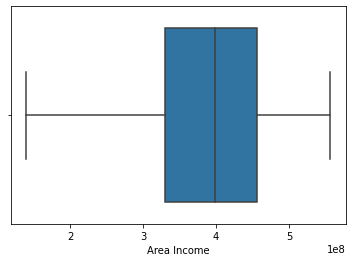

In [25]:
sns.boxplot(x = df_clean['Area Income'])

# **Feature Engineering**

## **Feature Extraction**

In [26]:
# Extract datetime variables using timestamp column and converting timestamp column into datatime object in order to extract new features
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp']) 
# Create a new feature called Year
df_clean['Year'] = df_clean.Timestamp.dt.year
# Creates a new column called Month
df_clean['Month'] = df_clean.Timestamp.dt.month 
# Creates a new column called Week
df_clean['Week'] =df_clean.Timestamp.dt.dayofweek 
# Creates a new column called Day
df_clean['Day'] = df_clean.Timestamp.dt.day

# rename feature Male to Gender
df_clean.rename(columns = {"Male" : "Gender"}, inplace = True)

In [27]:
df_clean.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,6,27
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,0,4
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,6,13
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,6,10
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,4,3


## **Feature encoding**

In [28]:
# label encoder
mapping_gender = {
    'Laki-Laki' : 0,
    'Perempuan' : 1}

mapping_clicked = {
    'No' : 0,
    'Yes' : 1}

df_clean['gender_mapped'] = df_clean['Gender'].map(mapping_gender)
df_clean['adclicked_mapped'] = df_clean['Clicked on Ad'].map(mapping_clicked)

In [29]:
# handle dengan one hot encoding
for cat in ['city', 'province', 'category']:
  onehots = pd.get_dummies(df_clean[cat], prefix=cat)
  df_clean = df_clean.join(onehots)

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 73 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Unnamed: 0                              1000 non-null   int64         
 1   Daily Time Spent on Site                1000 non-null   float64       
 2   Age                                     1000 non-null   int64         
 3   Area Income                             1000 non-null   float64       
 4   Daily Internet Usage                    1000 non-null   float64       
 5   Gender                                  1000 non-null   object        
 6   Timestamp                               1000 non-null   datetime64[ns]
 7   Clicked on Ad                           1000 non-null   object        
 8   city                                    1000 non-null   object        
 9   province                                1000 non-null

## **Feature selection (Remove Irrelevant Features)**

In [31]:
df_clean.drop(['Unnamed: 0','Timestamp','Clicked on Ad','city','province','category','Gender'], axis = 1, inplace=True)
df_clean.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Year,Month,Week,Day,gender_mapped,adclicked_mapped,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
158,80.46,27,399068320.0,182.65,2016,2,3,4,0,0,...,1,0,0,0,0,0,0,0,0,0
24,41.39,41,482736240.0,167.22,2016,6,0,13,1,1,...,0,1,0,0,0,0,0,0,0,0
34,57.64,57,319066440.0,133.81,2016,3,1,15,0,1,...,0,0,0,0,0,0,0,0,1,0
591,57.20,42,404173210.0,110.66,2016,3,5,19,1,1,...,0,0,0,0,0,0,0,0,1,0
361,62.14,41,415785230.0,110.93,2016,1,5,23,0,1,...,0,0,0,0,0,0,0,0,1,0


- unnamed:0 = Drop karena memiliki variasi yang tinggi,
- timestamp, clicked on ad, male, province, city, category = Remove karena telah dilakukan feature encoding sebelumnya

# **Modelling**

## **Split target & feature**

In [32]:
df_model = df_clean.copy()

In [33]:
df_model.var()

Daily Time Spent on Site    2.479174e+02
Age                         7.718611e+01
Area Income                 8.627432e+15
Daily Internet Usage        1.903482e+03
Year                        0.000000e+00
                                ...     
category_Furniture          8.848448e-02
category_Health             9.327728e-02
category_House              9.721622e-02
category_Otomotif           9.955556e-02
category_Travel             8.848448e-02
Length: 66, dtype: float64

In [34]:
X = df_model.drop(labels=['adclicked_mapped'],axis=1)
y = df_model[['adclicked_mapped']]

## **Split train and test dataset**

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state = 42)

In [36]:
print('Train:',X_train.shape)
print('Test:',X_test.shape)

Train: (700, 65)
Test: (300, 65)


In [37]:
from datetime import datetime as dt
from collections import defaultdict
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## **Without Normalization**

In [38]:
def modelling(x_train,x_test,y_train,y_test):
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    xgb = XGBClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    LGBM = lgb.LGBMClassifier()

    
    list_model = [('K-Nearest Neighbor',knn),
                  ('XgBoost', xgb),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad),
                  ('LightGBM',LGBM)
                  ]

    for model_name, model in list_model:
        start = dt.now()
        model.fit(x_train,y_train)
        duration = (dt.now()-start).total_seconds()

        y_pred = model.predict(x_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

In [39]:
evaluation_summary = modelling(X_train,X_test,y_train,y_test)
evaluation_summary = pd.DataFrame(evaluation_summary)
evaluation_summary

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.673333,0.640000,0.685714,0.024318
1,XgBoost,XGBClassifier(),0.960000,0.966667,0.953947,0.300660
2,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.963333,0.966667,0.960265,0.413293
3,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.960000,0.960000,0.960000,0.540293
4,LightGBM,LGBMClassifier(),0.973333,0.966667,0.979730,0.149096


## **With Normalization**

In [40]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [41]:
evaluation_summary2 = modelling(X_train_minmax,X_test_minmax,y_train,y_test)
evaluation_summary2 = pd.DataFrame(evaluation_summary2)
evaluation_summary2

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.723333,0.686667,0.741007,0.022282
1,XgBoost,XGBClassifier(),0.960000,0.966667,0.953947,0.330162
2,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.966667,0.973333,0.960526,0.562908
3,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.960000,0.960000,0.960000,0.345257
4,LightGBM,LGBMClassifier(),0.973333,0.966667,0.979730,0.106628


## **Model Evaluation**

**Confusion matrix**

In [42]:
lg_model = lgb.LGBMClassifier()
lg_model.fit(X_train, y_train)
y_pred_lg = lg_model.predict(X_test)

In [43]:
def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Click ad', 'Not Click ad'],
                 columns=['Predicted Click ad', 'Predicted Not Click ad'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(9,5))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');

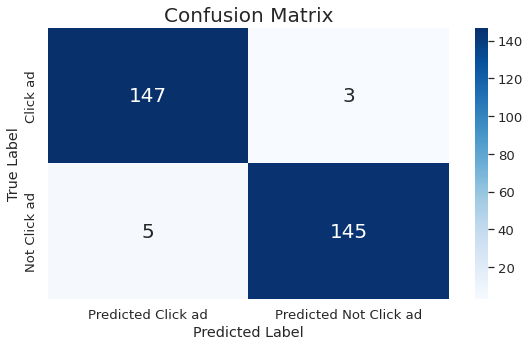

In [44]:
show_cmatrix(y_test, y_pred_lg)

Note:

- True Positive (TF): Prediksi bahwa customer akan click ad dan benar click ad (147)
- False Negatif (FN): Prediksi bahwa customer tidak akan click ad tapi ternyata click ad (3)
- False Positive (FP): Prediksi bahwa customer akan click ad tapi ternyata tidak click ad (5)
- True Negative (TN): Prediksi bahwa customer tidak akan click ad tapi teryata tidak click ad (145)

## **Feature importance**

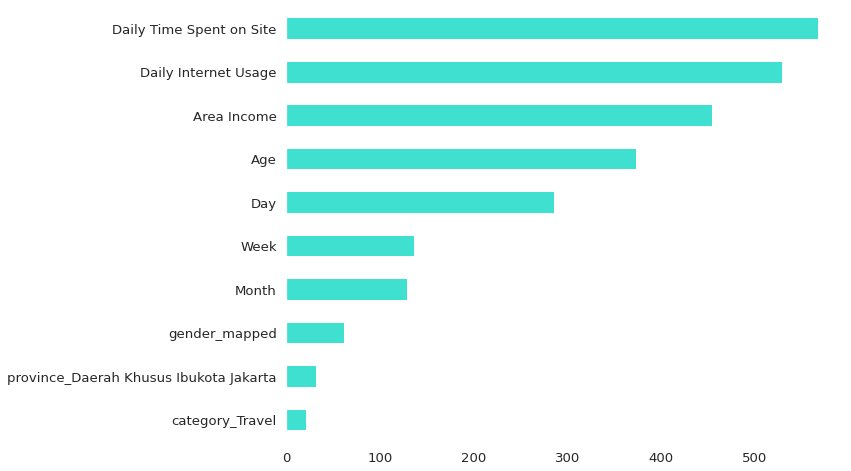

In [59]:
# plt.figsize(10, 8)
feat_importances = pd.Series(lg_model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8),color='turquoise')
ax.set(facecolor = "white")
ax.invert_yaxis()
